In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
data = pd.read_excel("./Elisa_s.xlsx", index_col=0, header=0)
#header=0是默认的
data

,90.00,30.00,10.00,3.33,1.11,0.37,0.00
標準品濃度(ng/ml),,,,,,,
吸光度,1.644,1.074,0.73,0.335,0.136,0.049,0.025


In [3]:
x=data.columns.values
y=data.values[0]

In [4]:
#近似させる関数の定義
#y = d + (a - d) / (1 + (x / c)^b)
def func(x, a, b, c,d ):
    return   d + (a - d) / (1 + (x / c)**b)  
 
# 近似関数を求める
#optimize.curve_fit返回值：一个元组 (popt,pcov)
#popt是一个一维数组，表示得到的拟合方程的参数。
#pcov是一个二维数组，是在popt参数下得到的协方差。
import scipy.optimize as optimize
popt, _ = optimize.curve_fit(func, x, y)
 
# 近似関数の決定係数(R2)を求める
import sklearn.metrics as metrics
r2 = metrics.r2_score(y, func(x, *popt))
#print(r2)

/var/folders/zy/fmjtcs7d20l0qcxcvljhtfwm0000gn/T/ipykernel_9990/1763082855.py:4: RuntimeWarning: divide by zero encountered in power
  return   d + (a - d) / (1 + (x / c)**b)


In [5]:
popt_=np.round(popt,4)
a,b,c,d=popt_

Text(0, 0.5, '吸光度')

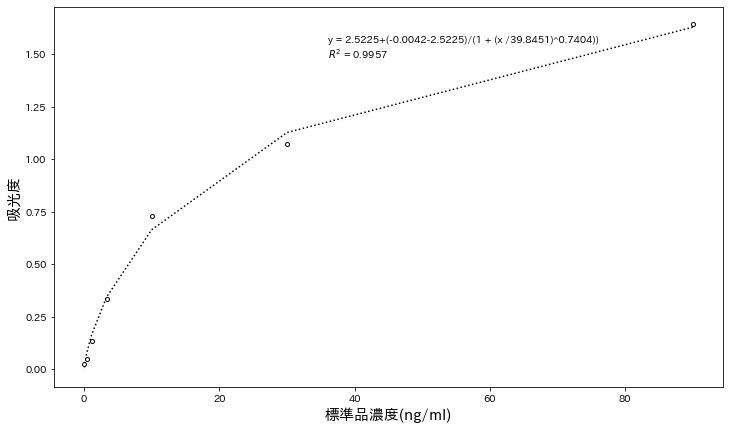

In [6]:
from sklearn.metrics import r2_score

plt.figure(figsize=(12,7))
plt.errorbar(x, y, capsize=5, fmt='o', markersize=4, ecolor='black', markeredgecolor = "black", color='w')
#coef=np.polyfit((d + (a - d) / (1 + (x / c)**b)), y, 1)
#appr = np.poly1d(coef)(x)
plt.plot(x, func(x, *popt),  color = 'black', linestyle=':')
#y_pred = [coef[0]*i+coef[1] for i in x]
r2 = r2_score(y, func(x, *popt))
plt.text(max(x)/2.5, max(y)*0.9, 'y = {:.4f}+({:.4f}-{:.4f})/(1 + (x /{:.4f})^{:.4f}))\n$R^2$ = {:.4f}'.format(popt[3],popt[0],popt[3],popt[2],popt[1],r2), fontsize=10) #max(x)/3.7和max(y)*6/8是文本标签的位置，分别代表x轴和y轴上的坐标
plt.xlabel(data.index.name, fontsize=15)
plt.ylabel(data.index[0], fontsize=15)
# plt.savefig('y_error_bar.png')

In [7]:
import sympy  # 引入解方程的专业模块sympy
def defunc(Y):
#    a, b, c, d = optimize.curve_fit(func, x, y)[0]
    X = sympy.symbols("X") # 申明未知数"x"
    ls = sympy.solve([d + (a - d) / (1 + (X / c)**b)-Y],[X]) # 写入需要解的方程体
    ls_solution1=ls[0]
    ls_solution=ls_solution1[0]
    return ls_solution
    return z # return出结果

In [8]:
elisa = pd.read_excel("./Elisa.xlsx", index_col=0, header=0)
#header=0是默认的
elisa

,10.000,5.000,2.500,1.250,0.625,0.000
FBS濃度%,,,,,,
吸光度,1.159,0.904,0.949,0.718,0.702,0.640
吸光度,0.922,0.768,0.659,0.563,0.647,0.373
吸光度,1.091,0.673,0.694,0.053,0.639,0.436
吸光度,1.230,0.696,0.787,0.717,0.441,0.217


Text(0.5, 1.0, 'Elisa吸光度')

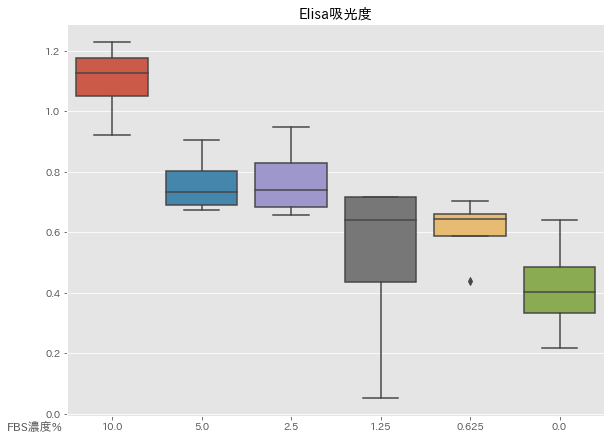

In [9]:
#设置图形的显示风格
plt.style.use('ggplot')

fig = plt.figure(constrained_layout=True, figsize=(8, 6)) #constrained_layoutをTrueにするとオブジェクトの配置が自動調整される
pic = sns.boxplot(data=elisa)
pic.set_xlabel('FBS濃度%',   #用plt也可以实现
              labelpad=-10, #调整x轴标签与x轴距离
              x=-0.06)  #调整x轴标签的左右位置
pic.set_title('Elisa吸光度')

In [10]:
y=elisa.apply(lambda x:x.mean(),axis=0).values
y_err=elisa.apply(lambda x:x.std(),axis=0).values  ##data.std(ddof=1) #1是默认值
x=elisa.columns.values

Text(0, 0.5, 'Elisa吸光度')

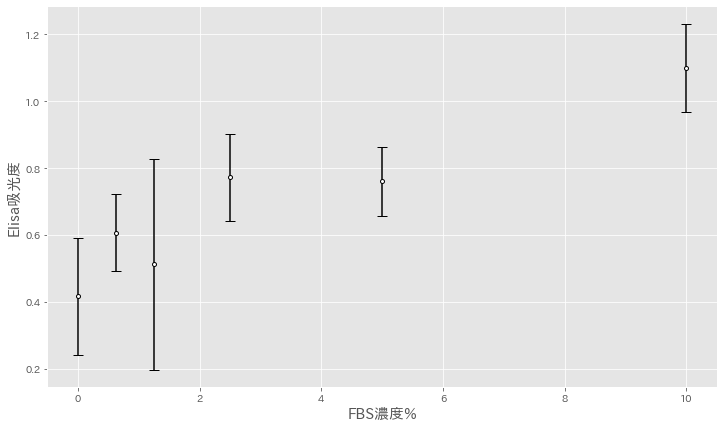

In [11]:
#from sklearn.metrics import r2_score
plt.figure(figsize=(12,7))
plt.errorbar(x, y, yerr = y_err, capsize=5, fmt='o', markersize=4, ecolor='black', markeredgecolor = "black", color='w')
#coef=np.polyfit(x, y, 1)
#appr = np.poly1d(coef)(x)
#plt.plot(x, appr,  color = 'black', linestyle=':')
#y_pred = [coef[0]*i+coef[1] for i in x]
#r2 = r2_score(y, y_pred)
#plt.text(max(x)/1.6, max(y)*1.05, 'y = {:.4f}x + {:.4f}, \n$R^2$ = {:.4f}'.format(coef[0], coef[1], r2), fontsize=10) #max(x)/3.7和max(y)*6/8是文本标签的位置，分别代表x轴和y轴上的坐标
plt.xlabel('FBS濃度%', fontsize=15)
plt.ylabel('Elisa吸光度', fontsize=15)

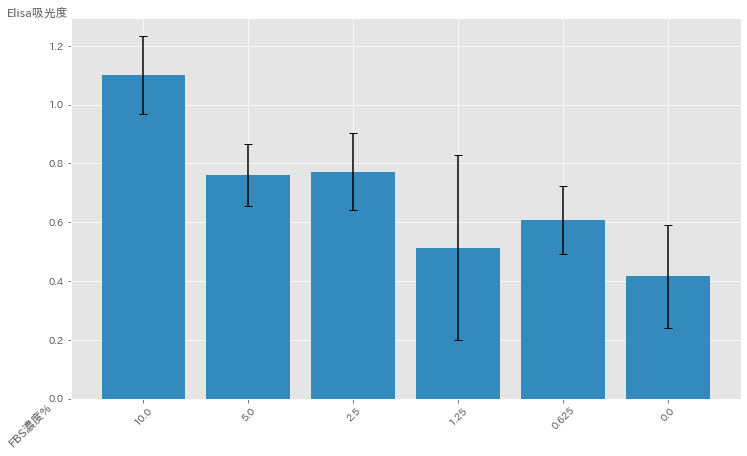

In [12]:
plt.figure(figsize=(12,7))
plt.bar(range(len(x)),y,tick_label=x,yerr=y_err, capsize=4,color='C1')  #第一个参数为x轴元素的个数， 第二个参数为y轴的值，tick_label为x轴各元素的值
plt.ylabel('Elisa吸光度',loc='top',rotation='horizontal',labelpad=-20)
plt.xlabel('FBS濃度%',
           rotation=45, #标签方向
           labelpad=-30, #调整x轴标签与x轴距离
           x=-0.06)  #调整x轴标签的左右位置
plt.xticks(rotation=45) #刻度方向
plt.show()

Text(0, 0.5, '吸光度')

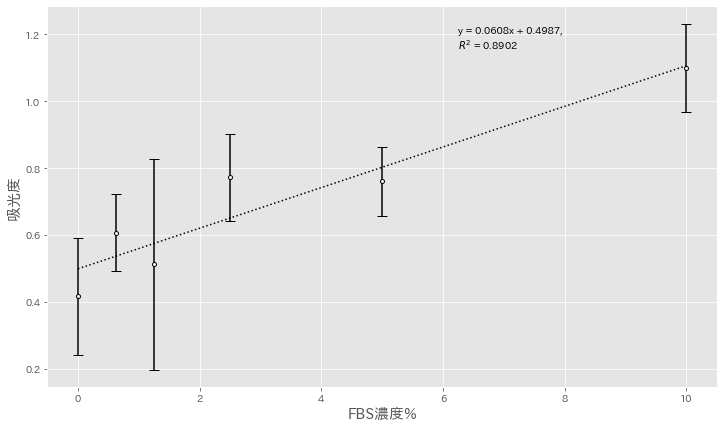

In [13]:
from sklearn.metrics import r2_score

plt.figure(figsize=(12,7))
plt.errorbar(x, y, yerr = y_err, capsize=5, fmt='o', markersize=4, ecolor='black', markeredgecolor = "black", color='w')
coef=np.polyfit(x, y, 1)
appr = np.poly1d(coef)(x)
plt.plot(x, appr,  color = 'black', linestyle=':')
y_pred = [coef[0]*i+coef[1] for i in x]
r2 = r2_score(y, y_pred)
plt.text(max(x)/1.6, max(y)*1.05, 'y = {:.4f}x + {:.4f}, \n$R^2$ = {:.4f}'.format(coef[0], coef[1], r2), fontsize=10) #max(x)/3.7和max(y)*6/8是文本标签的位置，分别代表x轴和y轴上的坐标
plt.xlabel('FBS濃度%', fontsize=15)
plt.ylabel('吸光度', fontsize=15)
# plt.savefig('y_error_bar.png')

In [14]:
concn = elisa.applymap(defunc)
concn

,10.000,5.000,2.500,1.250,0.625,0.000
FBS濃度%,,,,,,
吸光度,32.1500047263272,18.2583653385778,20.2473418125624,11.5673437818462,11.0895621631593,9.36205789630930
吸光度,19.0341556617344,13.1516927284794,9.87123684352595,7.46772305694610,9.54763674765399,3.79858274657907
吸光度,27.7523956658287,10.2576614089169,10.8557476650967,0.246502560172997,9.33573621663589,4.87155715496369
吸光度,37.4370573180221,10.9138881732002,13.7919672907391,11.5370803402015,4.96249486388103,1.68061973611458


Text(0, 0.5, 'ヒアルロン酸濃度(ng/ml)')

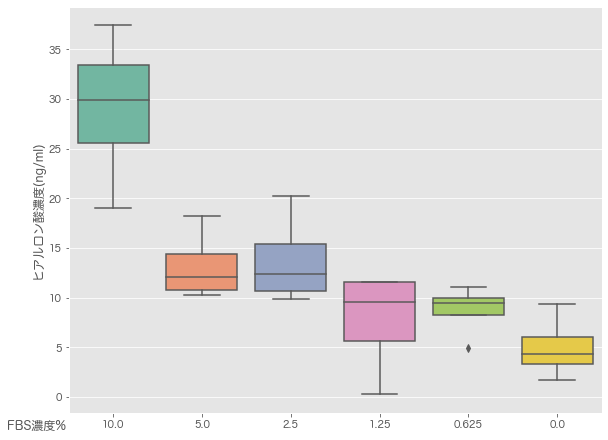

In [15]:
#设置图形的显示风格
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'#Matplotlib 文字化け、日本語対応
fig = plt.figure(constrained_layout=True, figsize=(8, 6)) #constrained_layoutをTrueにするとオブジェクトの配置が自動調整される
pic = sns.boxplot(data=concn, palette='Set2')
pic.set_xlabel('FBS濃度%',   #用plt也可以实现
              labelpad=-10, #调整x轴标签与x轴距离
              x=-0.06)  #调整x轴标签的左右位置
pic.set_ylabel('ヒアルロン酸濃度(ng/ml)')

In [16]:
with open("./d_r.txt","r") as file:
    d_r = float(file.read())

In [17]:
concn200 = concn.applymap(lambda x: x *d_r)

In [18]:
concn200

,10.000,5.000,2.500,1.250,0.625,0.000
FBS濃度%,,,,,,
吸光度,6430.00094526543,3651.67306771555,4049.46836251249,2313.46875636924,2217.91243263186,1872.41157926186
吸光度,3806.83113234688,2630.33854569588,1974.24736870519,1493.54461138922,1909.52734953080,759.716549315814
吸光度,5550.47913316574,2051.53228178338,2171.14953301933,49.3005120345994,1867.14724332718,974.311430992737
吸光度,7487.41146360442,2182.77763464004,2758.39345814781,2307.41606804030,992.498972776205,336.123947222916


Text(0, 0.5, 'ヒアルロン酸濃度(ng/ml)')

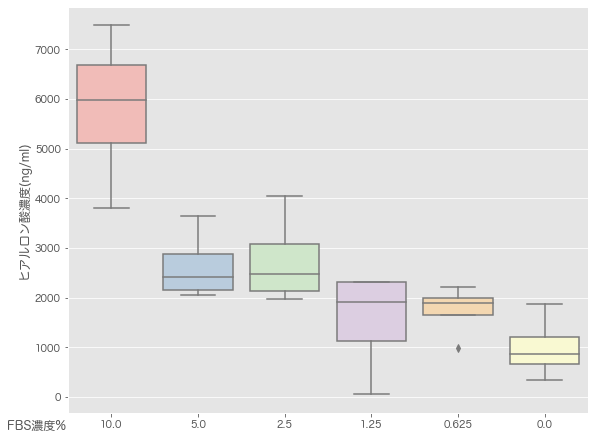

In [19]:
#设置图形的显示风格
plt.style.use('ggplot')

fig = plt.figure(constrained_layout=True, figsize=(8, 6)) #constrained_layoutをTrueにするとオブジェクトの配置が自動調整される
pic = sns.boxplot(data=concn200, palette='Pastel1')
pic.set_xlabel('FBS濃度%',   #用plt也可以实现
              labelpad=-10, #调整x轴标签与x轴距离
              x=-0.06)  #调整x轴标签的左右位置
pic.set_ylabel('ヒアルロン酸濃度(ng/ml)')

In [1]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [20]:
x_=x.astype(str)
x_

array(['10.0', '5.0', '2.5', '1.25', '0.625', '0.0'], dtype='<U32')

In [21]:
x=[10.0, 5.0, 2.5, 1.25, 0.625, 0.0]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10.0 vs. 5.0: t-test independent samples, P_val:9.937e-03 t=3.713e+00
10.0 vs. 2.5: t-test independent samples, P_val:1.466e-02 t=3.391e+00
10.0 vs. 1.25: t-test independent samples, P_val:3.965e-03 t=4.532e+00
2.5 vs. 0.0: t-test independent samples, P_val:2.165e-02 t=3.081e+00
10.0 vs. 0.625: t-test independent samples, P_val:2.570e-03 t=4.953e+00
5.0 vs. 0.0: t-test independent samples, P_val:1.487e-02 t=3.379e+00
10.0 vs. 0.0: t-test independent samples, P_val:1.226e-03 t=5.730e+00


(<AxesSubplot:ylabel='ヒアルロン酸濃度(ng/ml)'>,
  <statannotations.Annotation.Annotation at 0x7fe08f7127f0>])

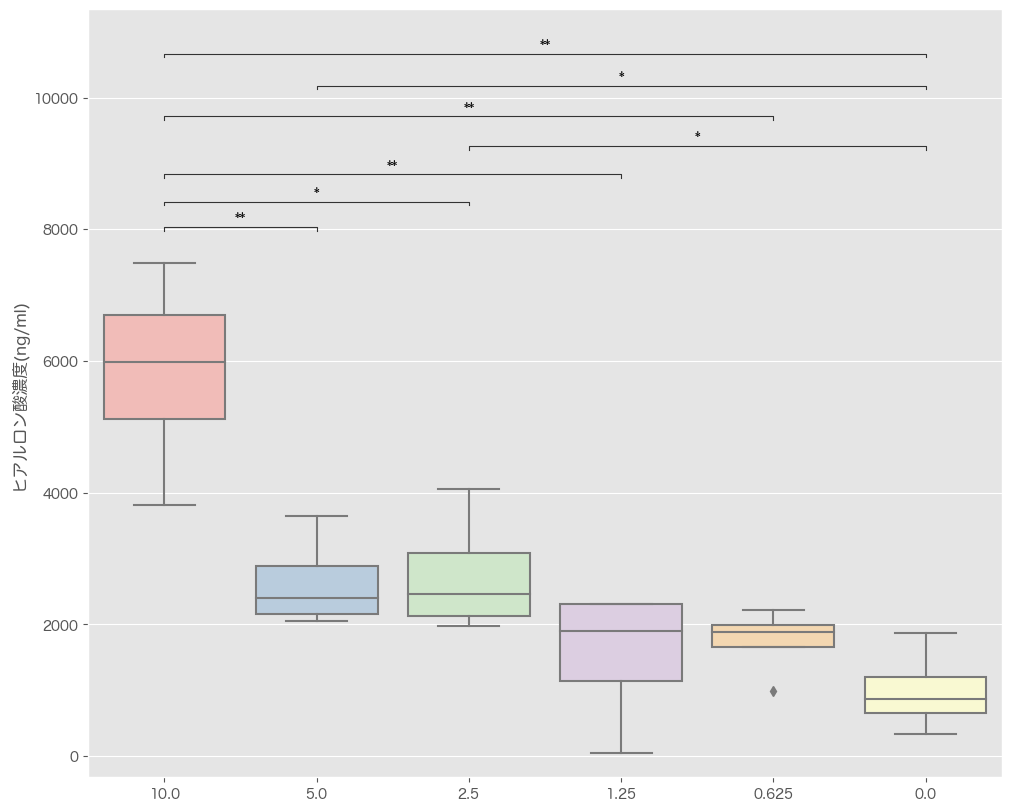

In [22]:
from statannotations.Annotator import Annotator

df = concn200
#y=elisa.index.values
#y_err=elisa.apply(lambda x:x.std(),axis=0).values  ##data.std(ddof=1) #1是默认值
#x=elisa.columns
#order = ['10.', '5.', '2.5', '1.25', '0.625', '0.'   ]
fig,ax = plt.subplots(constrained_layout=True, figsize=(10, 8), dpi=100)#,facecolor="w")
ax = sns.boxplot(data=df,ax=ax, palette='Pastel1')
ax.set_ylabel('ヒアルロン酸濃度(ng/ml)')

pairs=[(10,0), (10,0.625), (10,1.25),(10,2.5),(10,5),
       (5,0),
       (2.5,0),
      ]
annotator = Annotator(ax, pairs, data=df)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.007,line_width=0.8)
annotator.apply_and_annotate()



#ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
#for spine in ["top","left","right"]:
#    ax.spines[spine].set_visible(False)
#ax.spines['bottom'].set_linewidth(2)
#ax.grid(axis='y',ls='--',c='gray')
#ax.set_axisbelow(True)


In [23]:
y_elisa=concn200.apply(lambda x:x.mean(),axis=0).values
y_elisa_err=concn200.apply(lambda x:x.std(),axis=0).values  ##data.std(ddof=1) #1是默认值

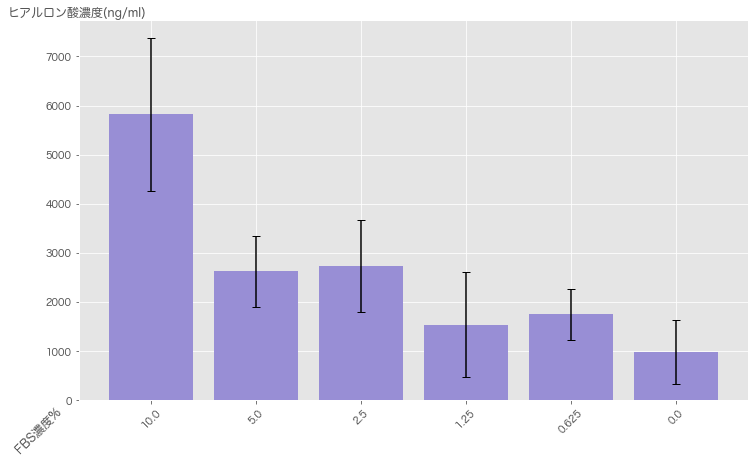

In [24]:
plt.figure(figsize=(12,7))
plt.bar(range(len(x)),y_elisa,tick_label=x,yerr=y_elisa_err, capsize=4,color='C9')  #第一个参数为x轴元素的个数， 第二个参数为y轴的值，tick_label为x轴各元素的值
plt.ylabel('ヒアルロン酸濃度(ng/ml)',loc='top',rotation='horizontal',labelpad=-100)
plt.xlabel('FBS濃度%',
           rotation=45, #标签方向
           labelpad=-30, #调整x轴标签与x轴距离
           x=-0.06)  #调整x轴标签的左右位置
plt.xticks(rotation=45) #刻度方向
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10.0 vs. 5.0: t-test independent samples, P_val:9.937e-03 t=3.713e+00
10.0 vs. 2.5: t-test independent samples, P_val:1.466e-02 t=3.391e+00
10.0 vs. 1.25: t-test independent samples, P_val:3.965e-03 t=4.532e+00
2.5 vs. 0.0: t-test independent samples, P_val:2.165e-02 t=3.081e+00
10.0 vs. 0.625: t-test independent samples, P_val:2.570e-03 t=4.953e+00
5.0 vs. 0.0: t-test independent samples, P_val:1.487e-02 t=3.379e+00
10.0 vs. 0.0: t-test independent samples, P_val:1.226e-03 t=5.730e+00


(<AxesSubplot:ylabel='ヒアルロン酸濃度(ng/ml)'>,
  <statannotations.Annotation.Annotation at 0x7fe0acfecd60>])

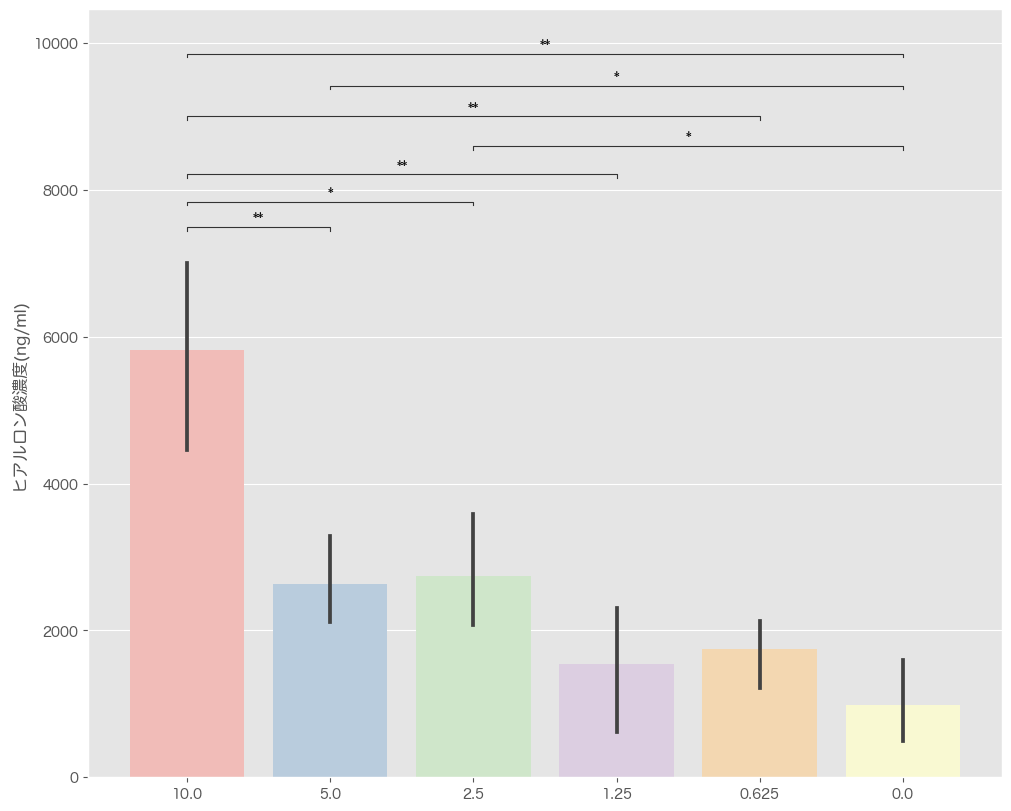

In [26]:
from statannotations.Annotator import Annotator

df = concn200
#y=elisa.index.values
#y_err=elisa.apply(lambda x:x.std(),axis=0).values  ##data.std(ddof=1) #1是默认值
#x=elisa.columns
#order = ['10.', '5.', '2.5', '1.25', '0.625', '0.'   ]
fig,ax = plt.subplots(constrained_layout=True, figsize=(10, 8), dpi=100)#,facecolor="w")
ax = sns.barplot(data=df,ax=ax, palette='Pastel1')
ax.set_ylabel('ヒアルロン酸濃度(ng/ml)')

pairs=[(10,0), (10,0.625), (10,1.25),(10,2.5),(10,5),
       (5,0),
       (2.5,0),
      ]
annotator = Annotator(ax, pairs, data=df)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.007,line_width=0.8)
annotator.apply_and_annotate()